**Imports**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from google.colab import drive
import copy
import math
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output

In [2]:
!gdown 1qxiCXBYM8Eh6FCM-Aw5cGE4RfePlMrdE

Downloading...
From: https://drive.google.com/uc?id=1qxiCXBYM8Eh6FCM-Aw5cGE4RfePlMrdE
To: /content/data.txt
100% 3.88k/3.88k [00:00<00:00, 6.53MB/s]


In [4]:
data = pd.read_csv("data.txt", header = None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.shape

(100, 3)

**Manipulating Dataset**

In [15]:
def min_max_scale(x):
  col_min = x.min(axis=0, keepdims=True).flatten()
  col_value = (x.max(axis=0, keepdims=True) - x.min(axis=0, keepdims=True)).flatten()

  for i in range(len(x)):
    x[i, 0] = (x[i, 0] - col_min[0]) / col_value[0]
    x[i, 1] = (x[i, 1] - col_min[1]) / col_value[1]
  return x

In [16]:
X_train = np.array( [ [x1, x2] for x1, x2 in zip(data['x1'], data['x2']) ] ) #(m,n)
y_train = np.array([y for y in data['y']])

x_train = min_max_scale(X_train) 
X_train

array([[0.06542784, 0.69465488],
       [0.00326632, 0.19470455],
       [0.08296784, 0.61961779],
       [0.43176427, 0.81600135],
       [0.7019434 , 0.65539214],
       [0.2153456 , 0.37665959],
       [0.44500891, 0.96545859],
       [0.64449684, 0.23365526],
       [0.65989108, 0.83229079],
       [0.77934283, 0.18940757],
       [0.94315096, 0.11165142],
       [0.64433793, 0.        ],
       [0.74887421, 0.67205614],
       [0.56336978, 0.98314328],
       [0.13586997, 0.6655353 ],
       [0.34273413, 0.85846452],
       [0.55914951, 0.32427783],
       [0.5430494 , 0.23547989],
       [0.58195856, 0.91295399],
       [0.67250409, 0.24862534],
       [0.53481039, 0.17922749],
       [0.85450448, 0.51557164],
       [0.29348214, 0.26737325],
       [0.05952839, 0.19931197],
       [0.68605319, 0.56205138],
       [0.46169753, 0.57643769],
       [0.71853306, 0.20827835],
       [0.90377581, 0.12008007],
       [0.45537943, 0.28788555],
       [0.12508388, 0.50379883],
       [0.

(100,)


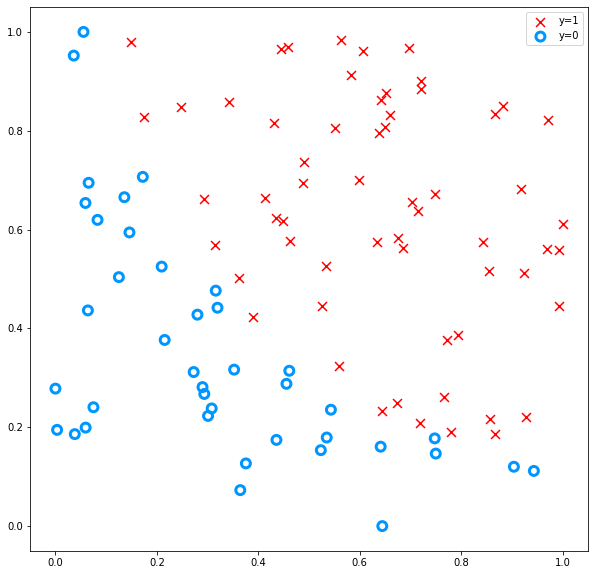

In [17]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(10,10))

pos = y_train == 1
neg = y_train == 0
print(pos.shape)

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

In [18]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [19]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

In [20]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

1.17359332246621


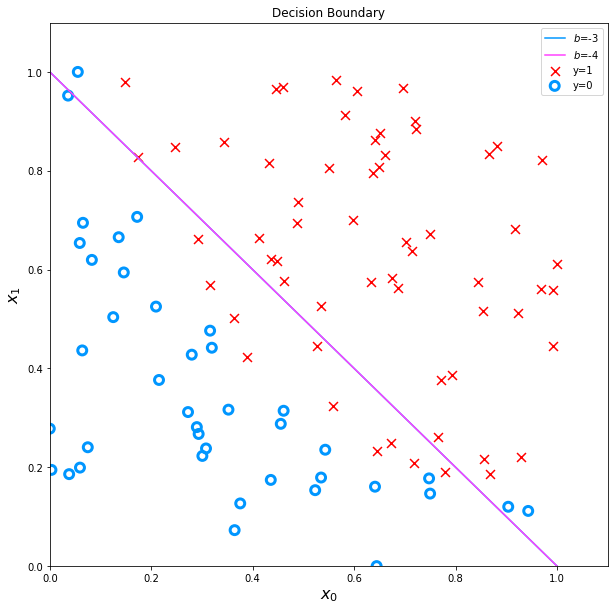

In [50]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 1 - x0
x1_other = 1 - x0

fig,ax = plt.subplots(1, 1, figsize=(10,10))
# Plot the decision boundary
ax.plot(x0,x1, c='#0096ff', label="$b$=-3")
ax.plot(x0,x1_other, c='#FF40FF', label="$b$=-4")
ax.axis([0, 1.1, 0, 1.1])

# Plot the original data

ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

# ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=16)
ax.set_xlabel('$x_0$', fontsize=16)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [24]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  1.17359332246621
Cost for b = -4 :  1.6884698491272594


**Gradient Descent**

In [27]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    # print(m,n)
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw

In [28]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing

In [29]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6891063308247324   
Iteration 1000: Cost 0.37121531228885346   
Iteration 2000: Cost 0.30362706169470133   
Iteration 3000: Cost 0.27349804277227746   
Iteration 4000: Cost 0.2563041438151084   
Iteration 5000: Cost 0.24515572256378046   
Iteration 6000: Cost 0.23734569208758788   
Iteration 7000: Cost 0.23158389570294344   
Iteration 8000: Cost 0.2271731157852497   
Iteration 9000: Cost 0.2237017240587235   

updated parameters: w:[9.34700661 8.76650439], b:-8.185799512531101


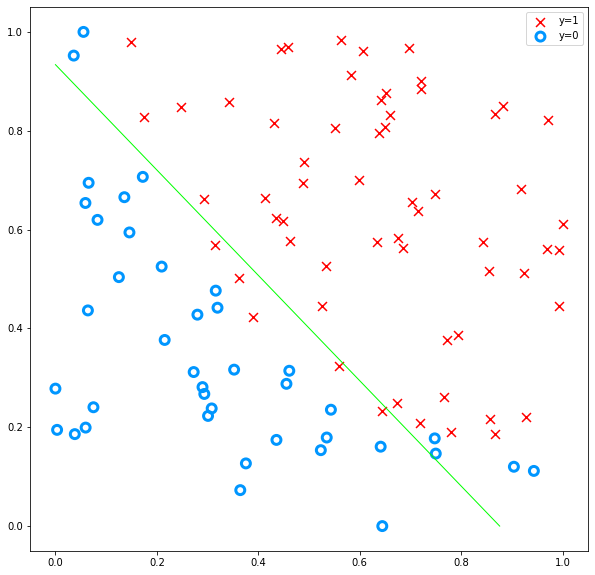

In [31]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

# Plot the original data
# ax.set_ylabel(r'$x_1$')
# ax.set_xlabel(r'$x_0$')   
# ax.axis([0, 4, 0, 3.5])


# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c='#00ff00', lw=1)
plt.show()